In [1120]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

__PATH__ = Path().parent
__DATA__ = __PATH__ / 'db'

def load_data(ref:str='hasil hasil belajar', type:str='xlsx', sheet:int=2) -> pd.DataFrame :
    """
    
    Fungsi ini mengembalikan data yang dibutuhkan untuk tugas Fuzzy Logic (Rules)
    ref : str 
        Nama file yang akan di load | default : 'hasil hasil belajar.xlsx'
    type : str {'xlsx','csv'}
        Tipe file yang akan di load | default : 'xlsx'
    sheet : int
        Sheet yang akan di load | default : 2
    
    Output : pd.DataFrame
    
    """
    try : 
        if type == 'xlsx' : 
            output = pd.read_excel(__DATA__ / f'{ref}.xlsx', sheet_name=sheet)
        elif type == 'csv' : 
            output = pd.read_csv(__DATA__ / f'{ref}.csv', sheet_name=sheet)
        else : 
            raise ValueError(f'Tipe file {type} tidak dikenal')
    except : 
        raise FileNotFoundError(f'File {ref} tidak ditemukan')
        # print(f'File {ref} tidak ditemukan')
    
    return output
    


In [1121]:
df = load_data()
df.head()

,Unnamed: 0,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,NaN,kecil,kecil,kecil,tidak lulus,100
1,NaN,kecil,kecil,sedang,tidak lulus,100
2,NaN,kecil,kecil,besar,tidak lulus,95
3,NaN,kecil,sedang,kecil,tidak lulus,100
4,NaN,kecil,sedang,sedang,tidak lulus,95


In [1122]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [1123]:
df.head()

,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,kecil,kecil,kecil,tidak lulus,100
1,kecil,kecil,sedang,tidak lulus,100
2,kecil,kecil,besar,tidak lulus,95
3,kecil,sedang,kecil,tidak lulus,100
4,kecil,sedang,sedang,tidak lulus,95


In [1124]:
df.columns
df.duplicated().sum()

np.int64(0)

In [1125]:
#Check duplikat
df_no_kepercayaan = df.drop(columns=['kepercayaan'])
df_no_kepercayaan.duplicated().sum()
print(len(df))

27


In [1126]:
for key,value in df.iterrows():
    print(key,value)

0 rata2 Lama akses materi                kecil
lama_berlatih (min 5, mak 15)          kecil
nilai                                  kecil
lulus                            tidak lulus
kepercayaan                              100
Name: 0, dtype: object
1 rata2 Lama akses materi                kecil
lama_berlatih (min 5, mak 15)          kecil
nilai                                 sedang
lulus                            tidak lulus
kepercayaan                              100
Name: 1, dtype: object
2 rata2 Lama akses materi                kecil
lama_berlatih (min 5, mak 15)          kecil
nilai                                  besar
lulus                            tidak lulus
kepercayaan                               95
Name: 2, dtype: object
3 rata2 Lama akses materi                kecil
lama_berlatih (min 5, mak 15)         sedang
nilai                                  kecil
lulus                            tidak lulus
kepercayaan                              100
Name: 3, dtype: object


In [1127]:
def triangular_fuzzy(max:float, min:float, mid:float, x:float) -> float:
    """
    Fungsi ini mengembalikan nilai fuzzy dari suatu nilai x
    max : float
        Batas atas
    min : float
        Batas bawah
    mid : float
        Nilai tengah
    x : float
        Nilai x yang akan dihitung
        
    Output : float
    """
    if x <= min : 
        return 0
    elif x <= mid : 
        return (x - min) / (mid - min)
    elif x <= max : 
        return (max - x) / (max - mid)
    else : 
        return 0


def trapezoidal_fuzzy(max:float, min:float, mid1:float, mid2:float, x:float, type:str) -> float:
    """
    Fungsi ini mengembalikan nilai fuzzy dari suatu nilai x
    max : float
        Batas atas
    min : float
        Batas bawah
    mid1 : float
        Nilai tengah 1
    mid2 : float
        Nilai tengah 2
    x : float
        Nilai x yang akan dihitung
    type : str {'left','right'}
        Tipe trapesium yang akan dihitung
        
    Output : float
    """
    if type == 'left' : 
        if x <= min : 
            return 1
        elif x <= mid1 : 
            return (x - min) / (mid1 - min)
        elif x <= mid2 : 
            return 1
        elif x <= max : 
            return (max - x) / (max - mid2)
        else : 
            return 0
    elif type == 'right' : 
        if x <= min : 
            return 0
        elif x <= mid1 : 
            return (x - min) / (mid1 - min)
        elif x <= mid2 : 
            return 1
        elif x <= max : 
            return (max - x) / (max - mid2)
        else : 
            return 1
    else : 
        return 0


In [1128]:
df.columns.to_list()

['rata2 Lama akses materi',
 'lama_berlatih (min 5, mak 15)',
 'nilai',
 'lulus',
 'kepercayaan']

In [1129]:
class DataFuzzy:
    def __init__(self, df_name, df_sheet_num) -> None:
        df_name = df_name or "hasil hasil belajar"
        df_sheet_num = df_sheet_num or 0
        self.df = load_data(df_name, sheet=df_sheet_num)
        self.findAllMax()
        self.findAllMin()
        self.columns = self.df.columns.to_list()
        self.makeFuzzyDomain()
        
    def findMax(self, column:str) -> float:
        return self.df[column].max()
    
    def findMin(self, column:str) -> float:
        return self.df[column].min()
    
    def findAll(self):
        self.findAllMax()
        self.findAllMin()
    
    def findAllMax(self) -> dict:
        self.AllMax = {col:self.findMax(col) for col in self.df.columns}

    def findAllMin(self) -> dict:
        self.AllMin = {col:self.findMin(col) for col in self.df.columns}
    
    def deleteColumns(self, columns:list) -> None:
        self.df.drop(columns=columns, inplace=True)
        
    @staticmethod
    def __menittoDetikconverter(x:str='7 menit, 32 detik') -> int:
        """
        Fungsi ini mengembalikan nilai detik dari suatu string waktu
        x : str
            String waktu dalam format 'menit menit, detik det
        Output : int
        """
        menit, detik = x.split(',')
        menit = int(menit.split(' ')[0])
        detik = int(detik.split(' ')[1])
        return menit*60+detik
    
    def changeMenitToDetik_Column(self, columns:list) -> None:
        for col in columns:
            self.df[col] = self.df[col].apply(lambda x: self.__menittoDetikconverter(x))
        self.findAll()
            
    @staticmethod
    def make_domain(min:int,max:int,amount:int) -> list:
        """
        Fungsi make_domain digunakan untuk membuat domain fuzzy
        
        min : nilai minimum dari domain fuzzy
        max : nilai maksimum dari domain fuzzy
        amount: jumlah domain fuzzy yang akan dibuat
        
        """
        
        domain = [(i-int((max-min)*0.05), i-1+(max-min)//amount+int((max-min)*0.05)) for i in range(min,max+(max%amount)+1,int((max-min)/amount))]
        # print(domain)
        if len(domain) > amount or domain[-1][1] > max:
            domain.pop()
            domain[-1] = (domain[-1][0],max)
        
        if len(domain) != amount:
            raise ValueError("Kesalahan dalam pembuatan domain fuzzy. Nilai yang digunakan tidak dapat dibagi rata dengan jumlah domain yang ingin dibuat")
        
        return domain            
            
    def makeFuzzyDomain(self, exception:list=[]) -> None:
        self.data_fuzzy = {}
        for value in self.columns:
            if(value not in exception):
                try:
                    # if(value == 'lama_berlatih (min 5, mak 15)'):
                    #     self.data_fuzzy[value] = (self.make_domain(5*60,15*60,3))
                    # else:
                    self.data_fuzzy[value] = (self.make_domain(int(self.AllMin[value]),int(self.AllMax[value]),3))
                except ValueError as e:
                    # print(e)
                    self.data_fuzzy[value] = None
                
    @staticmethod
    def checkRange(data:dict, title:str, value:int) -> list[int]:
        """
        Fungsi ini mengembalikan index rentang fuzzy dari suatu nilai
        data : dict
            Data fuzzy yang akan di cek
        title : str
            Judul data yang akan di cek
        value : int
            Nilai yang akan di cek
            
        Minus : Belum bisa mencari jika dia berada di 2 rentang bersamaan
            
        Output : list[int]
        """
        ans = []
        for idx, (min,max) in enumerate(data[title]):
            if (idx == 0) and (value <= min):
                ans.append(idx)
            elif (idx == len(data[title])-1) and (value >= max):
                ans.append(idx)
            elif value >= min and value <= max:
                ans.append(idx)
        return ans


    def showFigure(self) -> None:
        if self.data_fuzzy is None:
            raise ValueError("Data Fuzzy belum dibuat")
        
        if self.AllMax is None or self.AllMin is None:
            raise ValueError("Data Max atau Min belum dibuat")
        
        fig, ax = plt.subplots(1,len(self.data_fuzzy)-1,figsize=(10,2))  
        for key,data in enumerate(self.data_fuzzy):
            # print(key,data)
            if(data == 'keyakinan'):
                continue
            for idx, (min,max) in enumerate(self.data_fuzzy[data]):
                
                if idx == 0:
                    ax[key].plot([min, (max+min)/2, max], [1, 1, 0])
                elif idx == len(self.data_fuzzy[data])-1:
                    ax[key].plot([min, (max+min)/2, max], [0, 1, 1])
                else:
                    ax[key].plot([min, (max+min)/2, max], [0, 1, 0])
                
                ax[key].set_title(f'{data}', fontsize=6)
                # ax[key].set_xlabel('Nilai', fontsize=6)
                ax[key].set_ylabel('Fuzzy Value', fontsize=6)
                
    @staticmethod
    def flatten_list(list_flatten:list) -> list:
        """
        Fungsi flatten_list digunakan untuk meratakan list
        
        list_flatten : list yang akan diratakan
        
        """
        return [item for sublist in list_flatten for item in sublist]

    def Fuzzifikasi(self) -> dict:
        """"
        
        Fungsi ini digunakan untuk menghitung nilai fuzzy dari suatu data dan mendapatkan derajat keanggotaannya
        
        
        """
        if self.df is None:
            raise ValueError("Data belum di load")
        
        if self.data_fuzzy is None:
            raise ValueError("Data Fuzzy belum dibuat")
        
        all_result = []
        for key,value in self.df.iterrows():
            result = {}
            for idx, data in value.items():
                if (idx not in ['no', 'kesimpulannya', 'nilai']):
                    ans = []
                    selected = self.checkRange(self.data_fuzzy, idx, data)
                    # print(selected)
                    for num in selected:
                        maks = self.data_fuzzy[idx][num][1]
                        minn = self.data_fuzzy[idx][num][0]
                        if num == 0:
                            ans.append(trapezoidal_fuzzy(min=minn, mid1=minn, mid2=(maks+minn)/2, max=maks, x=data, type='left'))
                        elif num == len(self.data_fuzzy[idx])-1:
                            ans.append(trapezoidal_fuzzy(min=minn, mid1=(maks+minn)/2, mid2=maks, max=maks, x=data, type='right'))
                        else:
                            ans.append(triangular_fuzzy(min=minn, mid=(maks+minn)/2, max=maks, x=data))
                    result[idx] = selected, ans
                
            all_result.append(result)
            
        self.hasilFuzzy = all_result
        print(len(self.hasilFuzzy))
        return all_result
    
    def showFuzzyResult(self, idx:int) -> None:
        if self.hasilFuzzy is None:
            raise ValueError("Data Fuzzy belum dihitung")
        if idx >= len(self.hasilFuzzy):
            raise ValueError("Index yang diinput melebihi jumlah data")
        
        for key,value in self.hasilFuzzy[idx].items():
            print(key,value)
            
    @staticmethod
    def findCombination(data:list) -> list:
        """
        Fungsi ini mengembalikan semua kombinasi dari suatu list untuk fuzzy
        data : list
            List yang isinya list dari data yang ingin dicari
            
        Output : list
        """
        
        all_count = [0 for _ in range(len(data))]
        prob = 1
        for i in all_count:
            prob *= len(data[i])
        all_comb = []
        for _ in range(prob):
            # print(all_count)
            temp = []
            try :
                for idx,value in enumerate(all_count):
                    temp.append(data[idx][value])
                if temp not in all_comb:
                    all_comb.append(temp)
                    
                all_count[-1] += 1
                for i in range(len(all_count)-1,-1,-1):
                    if all_count[i] == len(data[i]):
                        all_count[i] = 0
                        all_count[i-1] += 1
            except:
                break                
        return all_comb
   
    def Inference(self) -> None:
        if self.hasilFuzzy is None:
            raise ValueError("Data Fuzzy belum dihitung")
        
        all_result = []
        for value in self.hasilFuzzy:
            result = []
            for idx, data in value.items():
                result.append(data[0])
                
            ans = self.findCombination((result))
            all_result.append(ans)
            
        
        mapping = {
            0 : 'rendah',
            1 : 'sedang',
            2 : 'besar'
        }
        
        for key,data in enumerate(all_result):
            all_result[key] = [[mapping[value] for value in comb] for comb in data]
        
        self.InferenceResult = all_result
        print(len(self.InferenceResult), len(self.hasilFuzzy))
        
        
        

In [1130]:
data_1 = DataFuzzy('hasil hasil belajar',0)
# data_1.deleteColumns()
#Cari min-max setiap data untuk membuat domain tiap kolom

        
# print(data_1_fuzzy)

In [1131]:
data_1.changeMenitToDetik_Column(['lama_berlatih (min 5, mak 15)'])

In [1132]:
data_1.df.head()

,no,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,kesimpulannya,keyakinan
0,7,590,452,75.00,1,65
1,12,521,790,77.00,1,78
2,1,532,1306,77.78,1,80
3,27,415,1679,77.78,1,78
4,76,596,1072,77.78,1,80


In [1133]:
data_1.findAll()
data_1.AllMax

{'no': np.int64(119),
 'rata2 Lama akses materi': np.int64(690),
 'lama_berlatih (min 5, mak 15)': np.int64(2270),
 'nilai': np.float64(100.0),
 'kesimpulannya': np.int64(1),
 'keyakinan': np.int64(100)}

In [1134]:
data_1.makeFuzzyDomain(exception=['no','kesimpulannya','keyakikan'])

In [1135]:
data_1.data_fuzzy

{'rata2 Lama akses materi': [(282, 448), (411, 577), (540, 690)],
 'lama_berlatih (min 5, mak 15)': [(272, 1095), (906, 1729), (1540, 2270)],
 'nilai': [(74, 83), (82, 91), (90, 100)],
 'keyakinan': [(64, 76), (75, 87), (86, 100)]}

In [1136]:
#Get result berdasarkan tiap data
#cari angka sekarang ada di rentang mana dalam data fuzzy

def checkRange(data:dict, title:str, value:int) -> list[int]:
    """
    Fungsi ini mengembalikan index rentang fuzzy dari suatu nilai
    data : dict
        Data fuzzy yang akan di cek
    title : str
        Judul data yang akan di cek
    value : int
        Nilai yang akan di cek
        
    Minus : Belum bisa mencari jika dia berada di 2 rentang bersamaan
        
    Output : list[int]
    """
    ans = []
    for idx, (min,max) in enumerate(data[title]):
        if (idx == 0) and (value <= min):
            ans.append(idx)
        elif (idx == len(data[title])-1) and (value >= max):
            ans.append(idx)
        elif value >= min and value <= max:
            ans.append(idx)
    return ans

checkRange(data_1.data_fuzzy, 'lama_berlatih (min 5, mak 15)', 600)


[0]

In [1137]:
data_1.data_fuzzy

{'rata2 Lama akses materi': [(282, 448), (411, 577), (540, 690)],
 'lama_berlatih (min 5, mak 15)': [(272, 1095), (906, 1729), (1540, 2270)],
 'nilai': [(74, 83), (82, 91), (90, 100)],
 'keyakinan': [(64, 76), (75, 87), (86, 100)]}

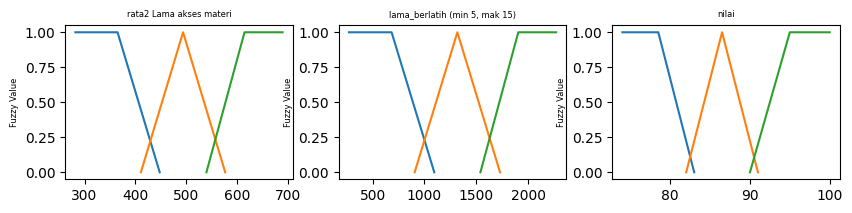

In [1138]:
data_1.showFigure()

In [1139]:
data_1.Fuzzifikasi()

49


[{'rata2 Lama akses materi': ([2], [0.6666666666666666]),
  'lama_berlatih (min 5, mak 15)': ([0], [1]),
  'keyakinan': ([0], [1])},
 {'rata2 Lama akses materi': ([1], [0.6746987951807228]),
  'lama_berlatih (min 5, mak 15)': ([0], [0.741190765492102]),
  'keyakinan': ([1], [0.5])},
 {'rata2 Lama akses materi': ([1], [0.5421686746987951]),
  'lama_berlatih (min 5, mak 15)': ([1], [0.9720534629404617]),
  'keyakinan': ([1], [0.8333333333333334])},
 {'rata2 Lama akses materi': ([0, 1],
   [0.39759036144578314, 0.04819277108433735]),
  'lama_berlatih (min 5, mak 15)': ([1, 2],
   [0.12150668286755771, 0.38082191780821917]),
  'keyakinan': ([1], [0.5])},
 {'rata2 Lama akses materi': ([2], [0.7466666666666667]),
  'lama_berlatih (min 5, mak 15)': ([0, 1],
   [0.05589307411907655, 0.40340218712029163]),
  'keyakinan': ([1], [0.8333333333333334])},
 {'rata2 Lama akses materi': ([1], [0.9036144578313253]),
  'lama_berlatih (min 5, mak 15)': ([1], [0.6585662211421628]),
  'keyakinan': ([1], [0.

In [1140]:
data_1.showFuzzyResult(0)

rata2 Lama akses materi ([2], [0.6666666666666666])
lama_berlatih (min 5, mak 15) ([0], [1])
keyakinan ([0], [1])


In [1141]:
def flatten_list(list_flatten:list) -> list:
    """
    Fungsi flatten_list digunakan untuk meratakan list
    
    list_flatten : list yang akan diratakan
    
    """
    return [item for sublist in list_flatten for item in sublist]

In [1142]:

#Cari semua kombinasi dari hasil fuzzy
def findCombination(data:list) -> list:
    """
    Fungsi ini mengembalikan semua kombinasi dari suatu list untuk fuzzy
    data : list
        List yang isinya list dari data yang ingin dicari
        
    Output : list
    """
    
    all_count = [0 for _ in range(len(data))]
    all_comb = []
    while(True):
        # print(all_count)
        temp = []
        for idx,value in enumerate(all_count):
            temp.append(data[idx][value])
        if temp not in all_comb:
            all_comb.append(temp)
            
        all_count[-1] += 1
        for i in range(len(all_count)-1,-1,-1):
            if all_count[i] == len(data[i]):
                all_count[i] = 0
                all_count[i-1] += 1
        
        if(all_count[-1] >= len(data[-1])):
            break
            
    return all_comb



In [1143]:
data_1.hasilFuzzy[0]
# find=[]
# for key,value in data_1.hasilFuzzy[0].items():
#     find.append(value[0])
# print(find)

{'rata2 Lama akses materi': ([2], [0.6666666666666666]),
 'lama_berlatih (min 5, mak 15)': ([0], [1]),
 'keyakinan': ([0], [1])}

In [1144]:
data_1.Inference()

49 49


In [1145]:
data_1.hasilFuzzy[3]

{'rata2 Lama akses materi': ([0, 1],
  [0.39759036144578314, 0.04819277108433735]),
 'lama_berlatih (min 5, mak 15)': ([1, 2],
  [0.12150668286755771, 0.38082191780821917]),
 'keyakinan': ([1], [0.5])}

In [1146]:
data_1.InferenceResult

[[['besar', 'rendah', 'rendah']],
 [['sedang', 'rendah', 'sedang']],
 [['sedang', 'sedang', 'sedang']],
 [['rendah', 'sedang', 'sedang'],
  ['rendah', 'besar', 'sedang'],
  ['sedang', 'sedang', 'sedang'],
  ['sedang', 'besar', 'sedang']],
 [['besar', 'rendah', 'sedang']],
 [['sedang', 'sedang', 'sedang']],
 [['sedang', 'rendah', 'besar']],
 [['sedang', 'rendah', 'sedang']],
 [['besar', 'sedang', 'besar']],
 [['sedang', 'rendah', 'besar']],
 [['rendah', 'rendah', 'sedang']],
 [['sedang', 'rendah', 'sedang']],
 [['sedang', 'sedang', 'besar']],
 [['sedang', 'rendah', 'sedang'], ['besar', 'rendah', 'sedang']],
 [['rendah', 'rendah', 'rendah']],
 [['sedang', 'rendah', 'rendah'], ['besar', 'rendah', 'rendah']],
 [['sedang', 'rendah', 'sedang']],
 [['sedang', 'rendah', 'sedang'], ['besar', 'rendah', 'sedang']],
 [['sedang', 'rendah', 'besar']],
 [['sedang', 'besar', 'besar'], ['besar', 'besar', 'besar']],
 [['rendah', 'sedang', 'besar'],
  ['rendah', 'besar', 'besar'],
  ['sedang', 'sedang', 

In [1147]:
combination_result = findCombination([[0,1],[1,2],[1]])
mapping = {
    0 : 'kecil',
    1 : 'sedang',
    2 : 'besar'
}

print(combination_result)
combination_result = [[mapping[value] for value in comb] for comb in combination_result]

[[0, 1, 1], [0, 2, 1], [1, 1, 1], [1, 2, 1]]


In [1148]:
combination_result

[['kecil', 'sedang', 'sedang'],
 ['kecil', 'besar', 'sedang'],
 ['sedang', 'sedang', 'sedang'],
 ['sedang', 'besar', 'sedang']]

In [1149]:
df.head()

,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,kecil,kecil,kecil,tidak lulus,100
1,kecil,kecil,sedang,tidak lulus,100
2,kecil,kecil,besar,tidak lulus,95
3,kecil,sedang,kecil,tidak lulus,100
4,kecil,sedang,sedang,tidak lulus,95


In [1150]:
#find combination in rules
all_value = []
for key,value in df.iterrows():
    for comb in combination_result:
        # print(comb)
        if value['rata2 Lama akses materi'] == comb[0]:
            if value['lama_berlatih (min 5, mak 15)'] == comb[1]:
                if value['nilai'] == comb[2]:
                    all_value.append(value)

In [1151]:
all_value

[rata2 Lama akses materi                kecil
 lama_berlatih (min 5, mak 15)         sedang
 nilai                                 sedang
 lulus                            tidak lulus
 kepercayaan                               95
 Name: 4, dtype: object,
 rata2 Lama akses materi                kecil
 lama_berlatih (min 5, mak 15)          besar
 nilai                                 sedang
 lulus                            tidak lulus
 kepercayaan                               90
 Name: 7, dtype: object,
 rata2 Lama akses materi          sedang
 lama_berlatih (min 5, mak 15)    sedang
 nilai                            sedang
 lulus                             lulus
 kepercayaan                          75
 Name: 13, dtype: object,
 rata2 Lama akses materi          sedang
 lama_berlatih (min 5, mak 15)     besar
 nilai                            sedang
 lulus                             lulus
 kepercayaan                          80
 Name: 16, dtype: object]

In [1152]:
for key,value in result_dict.values():
    print(value)

[0.39759036144578314, 0.04819277108433735]
[0.12150668286755771, 0.38082191780821917]
[0.5]


In [1153]:
dataas = [[0,1],[2],[0]]
dataas[2]

[0]

In [1154]:
for key,value in data_1.df.iterrows():
    for title, data in value.items():
        if title not in ['no','kesimpulannya','keyakikan']:
            selected_triangle = checkRange(data_1.data_fuzzy, title, data)
            if(len(selected_triangle) == 2):
                print(key)

3
3
4
6
7
9
13
15
17
19
20
20
22
22
24
28
30
31
37
38
41
42
43
44
47
